In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#AS the data does not have columns; I need to add it to make the job simple

df = pd.read_csv("breast-cancer-wisconsin.txt", sep=",", header= None)
df.columns = ["id", "clump_thickness", "uniformity_cell_size", 
"uniformity_cell_shape", "marginal_adhesion", "single_elipticall_cell_size",
"bare_nuclei", "bland_chromatin", "nomal_nucleoli", "mitosis", "class"]

In [3]:
df.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_elipticall_cell_size,bare_nuclei,bland_chromatin,nomal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# As the description of the data says that most data points are range between 1-10; I need to check if it is actually the case. If not I need to change it

for i in df.columns[1:]:
    print(str(i) + ":" + str(df[i].unique()))

clump_thickness:[ 5  3  6  4  8  1  2  7 10  9]
uniformity_cell_size:[ 1  4  8 10  2  3  7  5  6  9]
uniformity_cell_shape:[ 1  4  8 10  2  3  5  6  7  9]
marginal_adhesion:[ 1  5  3  8 10  4  6  2  9  7]
single_elipticall_cell_size:[ 2  7  3  1  6  4  5  8 10  9]
bare_nuclei:['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
bland_chromatin:[ 3  9  1  2  4  5  7  8  6 10]
nomal_nucleoli:[ 1  2  7  4  5  3 10  6  9  8]
mitosis:[ 1  5  4  2  3  7 10  8  6]
class:[2 4]


Bare nuclei has "?" and string values. which is not suitable for our numeric model. It needs to be changed

In [5]:
df['bare_nuclei'].value_counts()

#There are about 16 values like '?'

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [6]:
# here I replace ? with -9999 because the algorithm will treat it as the outlier which is good strategy instead of dropping the whole row. As the other normal values do
# not even come close to this I think we will not face any problems

df['bare_nuclei'].replace('?', -9999, inplace = True )

The id column does not serve any purpose in our analysis so we will drop it

In [7]:
df.drop('id', axis = 1, inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              699 non-null    int64 
 1   uniformity_cell_size         699 non-null    int64 
 2   uniformity_cell_shape        699 non-null    int64 
 3   marginal_adhesion            699 non-null    int64 
 4   single_elipticall_cell_size  699 non-null    int64 
 5   bare_nuclei                  699 non-null    object
 6   bland_chromatin              699 non-null    int64 
 7   nomal_nucleoli               699 non-null    int64 
 8   mitosis                      699 non-null    int64 
 9   class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


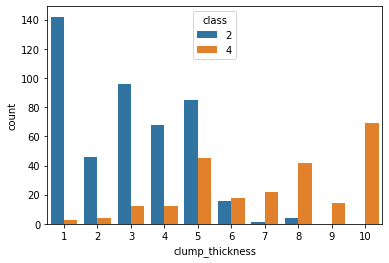

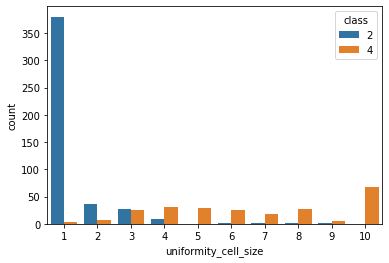

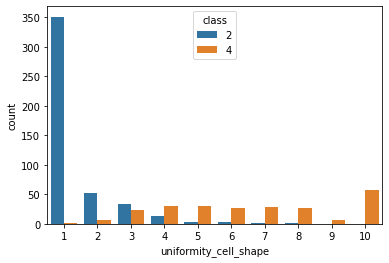

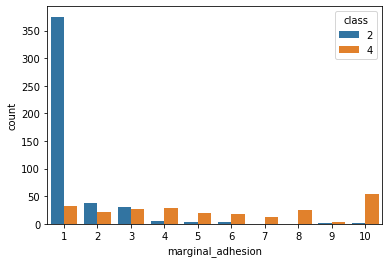

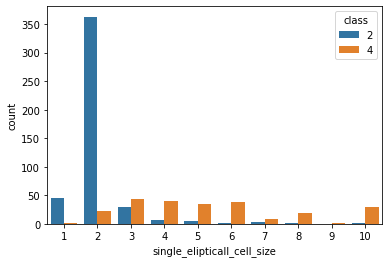

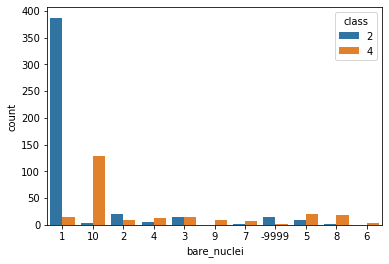

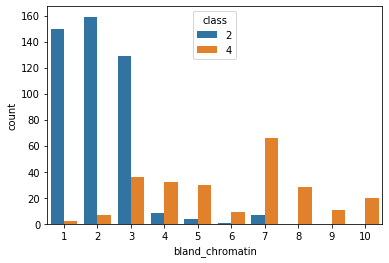

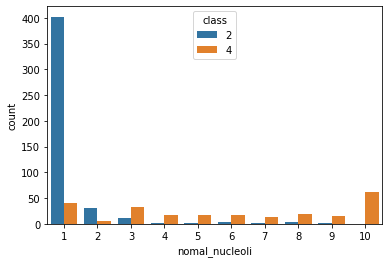

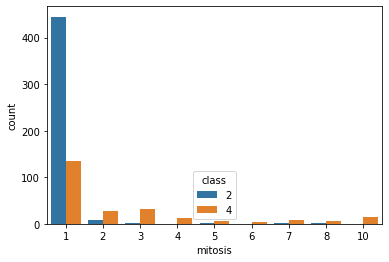

In [9]:
for i in df.columns[:-1]:
    sns.countplot(df[i], hue=df['class'])
    plt.show()

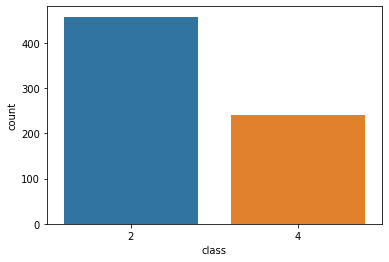

In [10]:
sns.countplot(df['class'])

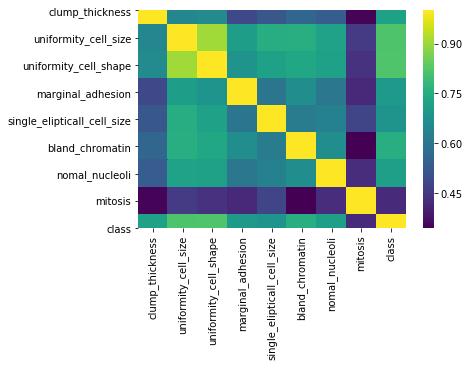

In [11]:
sns.heatmap(df.corr(), cmap='viridis')

## Model

In [12]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
predictions = clf.predict(X_test)

In [17]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9696969696969697


In [18]:
confusion_matrix(y_test, predictions )

array([[152,   2],
       [  5,  72]], dtype=int64)

In [19]:
# Accuracy score of out model is 0.96 which is pretty good. Apart from that the in confusion matrix out false negatives and false positives are also pretty low.
# Which is definately a good sign